<a href="https://colab.research.google.com/github/shivansh2310/SM_Analytics/blob/main/SM_Analytics_Week1_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# install main library YFinance
!pip install yfinance &> /dev/null

# Question 1

In [2]:
# IMPORTS
import numpy as np
import pandas as pd

#Fin Data Sources
import yfinance as yf
import pandas_datareader as pdr

#Data viz
import plotly.graph_objs as go
import plotly.express as px

import time
from datetime import date


In [3]:
start_date = '2022-01-01'
end_date = '2024-01-01'

In [4]:
# Download Real Gross Domestic Product (GDPPOT) data from FRED
start_date = '2022-01-01'
end_date = '2024-01-01'
gdp_data = pdr.DataReader('GDPPOT', 'fred', start_date, end_date)

# Calculate year-over-year (YoY) growth rates for each quarter in 2023
gdp_yoy_2023 = (gdp_data.loc['2023-01-01':'2023-10-01'] / gdp_data.loc['2022-01-01':'2022-10-01'].values - 1) * 100

# Calculate the average YoY growth rate for 2023
average_gdp_yoy_2023 = gdp_yoy_2023.mean()

# Round the average to one decimal place
rounded_average_gdp_yoy_2023 = round(average_gdp_yoy_2023, 1)

rounded_average_gdp_yoy_2023

GDPPOT    2.2
dtype: float64

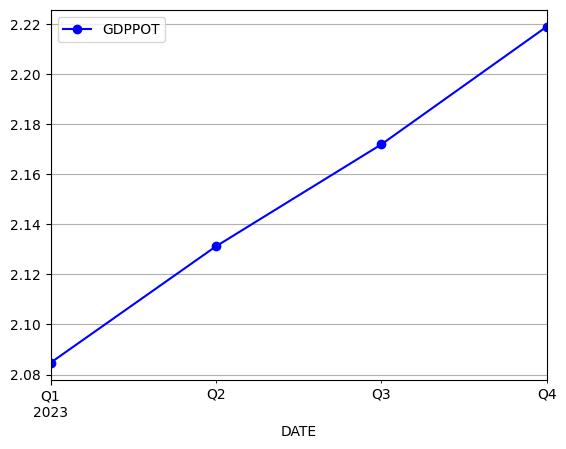

In [5]:
# Visuals GDPPOT
# https://cmdlinetips.com/2019/10/how-to-make-a-plot-with-two-different-y-axis-in-python-with-matplotlib/

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

gdp_yoy_2023.plot( color="blue", marker="o", label="US Potential GDP Growth, % Y/Y")
plt.grid(True)


# Question 2

In [6]:
start_date = '2000-01-01'
end_date = '2024-04-20'

In [7]:
dgs10 = pdr.DataReader("DGS10", "fred", start=start_date)
dgs10.tail()


,DGS10
DATE,
2024-04-12,4.50
2024-04-15,4.63
2024-04-16,4.67
2024-04-17,4.59
2024-04-18,4.64


In [8]:
dgs2 = pdr.DataReader("DGS2", "fred", start=start_date)
dgs2.tail()

,DGS2
DATE,
2024-04-12,4.88
2024-04-15,4.93
2024-04-16,4.97
2024-04-17,4.93
2024-04-18,4.98


In [9]:
main_dgs = dgs10.join(dgs2)
main_dgs

,DGS10,DGS2
DATE,,
2000-01-03,6.58,6.38
2000-01-04,6.49,6.30
2000-01-05,6.62,6.38
2000-01-06,6.57,6.35
2000-01-07,6.52,6.31
...,...,...
2024-04-12,4.50,4.88
2024-04-15,4.63,4.93
2024-04-16,4.67,4.97


In [10]:
main_dgs['diff'] = main_dgs['DGS10'] - main_dgs['DGS2']
main_dgs

,DGS10,DGS2,diff
DATE,,,
2000-01-03,6.58,6.38,0.20
2000-01-04,6.49,6.30,0.19
2000-01-05,6.62,6.38,0.24
2000-01-06,6.57,6.35,0.22
2000-01-07,6.52,6.31,0.21
...,...,...,...
2024-04-12,4.50,4.88,-0.38
2024-04-15,4.63,4.93,-0.30
2024-04-16,4.67,4.97,-0.30


In [11]:
min_value = round(main_dgs['diff'].min(), 1)
print(min_value)

-1.1


# Question 3

In [12]:
start_date = '2019-04-09'
end_date = '2024-04-09'

sp500_data = yf.download('^GSPC', start=start_date, end=end_date)
ipc_data = yf.download('^MXX', start=start_date, end=end_date)

# Calculate the growth rates for each index over the 5-year period
sp500_growth = (sp500_data['Close'][-1] / sp500_data['Close'][0] - 1) * 100
ipc_growth = (ipc_data['Close'][-1] / ipc_data['Close'][0] - 1) * 100

# Determine the index with the higher growth rate and the largest growth
if sp500_growth > ipc_growth:
    higher_growing_index = 'S&P 500 (^GSPC)'
    largest_growth = round(sp500_growth, 0)
else:
    higher_growing_index = 'IPC Mexico (^MXX)'
    largest_growth = round(ipc_growth, 0)

print("Results:")
print("Higher growing index:", higher_growing_index)
print("Largest growth rate (%):", largest_growth)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

Results:
Higher growing index: S&P 500 (^GSPC)
Largest growth rate (%): 81.0


# Question 4

In [13]:
def assets(tickers):
  for i in tickers:
    asset_df = yf.download(tickers, start='2023-01-01', end='2023-12-31', progress=False)
    asset_df = asset_df['Adj Close'].dropna()
    asset_df.columns = tickers

  asset_df.reset_index(inplace=True)

  return asset_df

In [14]:
tickers = ['2222.SR', 'BRK-B', 'AAPL', 'MSFT', 'GOOG', 'JPM']
main_df = assets(tickers)
main_df.head()

,Date,2222.SR,BRK-B,AAPL,MSFT,GOOG,JPM
0,2023-01-03,28.256075,124.216301,309.910004,89.699997,129.648499,237.036026
1,2023-01-04,27.860577,125.497498,314.549988,88.709999,130.857483,226.667297
2,2023-01-05,27.728746,124.166641,312.899994,86.769997,130.828491,219.949387
3,2023-01-09,27.860577,129.261627,315.529999,88.800003,132.781006,224.708282
4,2023-01-10,27.992409,129.837646,316.350006,89.239998,133.969910,226.419937


In [15]:
main_df.columns

Index(['Date', '2222.SR', 'BRK-B', 'AAPL', 'MSFT', 'GOOG', 'JPM'], dtype='object')

In [16]:
def calculate_range(df_column):
    min_value = df_column.min()
    max_value = df_column.max()
    range_ratio = round((max_value-min_value)/max_value, 2)
    return range_ratio

In [17]:

range_2222_SR = calculate_range(main_df['2222.SR'])
print("Range Ratioc'2222.SR':", range_2222_SR)

range_BRK = calculate_range(main_df['BRK-B'])
print("Range Ratioc'BRK-B':", range_BRK)

range_AAPL = calculate_range(main_df['AAPL'])
print("Range Ratioc'AAPL':", range_AAPL)

range_MSFT = calculate_range(main_df['MSFT'])
print("Range Ratioc'MSFT':", range_MSFT)

range_GOOG = calculate_range(main_df['GOOG'])
print("Range Ratioc'GOOG':", range_GOOG)

range_JPM = calculate_range(main_df['JPM'])
print("Range Ratioc'JPM':", range_JPM)



Range Ratioc'2222.SR': 0.21
Range Ratioc'BRK-B': 0.37
Range Ratioc'AAPL': 0.2
Range Ratioc'MSFT': 0.39
Range Ratioc'GOOG': 0.27
Range Ratioc'JPM': 0.42


# Question 5

In [18]:
stock_tickers = ['2222.SR', 'BRK-B', 'AAPL', 'MSFT', 'GOOG', 'JPM']

In [19]:
dividend_yields = {}

In [20]:
for ticker in stock_tickers:

    stock = yf.Ticker(ticker)
    dividends = stock.dividends.loc['2023-01-01':'2023-12-31']


    if not dividends.empty:
        closing_price_2023 = stock.history(start='2023-01-01', end='2023-12-31')['Close'].iloc[0]
        dividend_yield = (dividends.sum() / closing_price_2023) * 100


        dividend_yields[ticker] = dividend_yield


largest_yield_ticker = max(dividend_yields, key=dividend_yields.get)
largest_yield = round(dividend_yields[largest_yield_ticker], 1)

print("Largest dividend yield:")
print("Ticker:", largest_yield_ticker)
print("Dividend Yield (%):", largest_yield)

Largest dividend yield:
Ticker: 2222.SR
Dividend Yield (%): 3.2


# Question 6

In [21]:
start_date = '2000-01-01'
end_date = '2024-04-20'

In [22]:
sp500_data = yf.download('^GSPC', start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [23]:
sp500_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,1469.250000,1478.000000,1438.359985,1455.219971,1455.219971,931800000
2000-01-04,1455.219971,1455.219971,1397.430054,1399.420044,1399.420044,1009000000
2000-01-05,1399.420044,1413.270020,1377.680054,1402.109985,1402.109985,1085500000
2000-01-06,1402.109985,1411.900024,1392.099976,1403.449951,1403.449951,1092300000
2000-01-07,1403.449951,1441.469971,1400.729980,1441.469971,1441.469971,1225200000
...,...,...,...,...,...,...
2024-04-15,5149.669922,5168.430176,5052.470215,5061.819824,5061.819824,3950210000
2024-04-16,5064.589844,5079.839844,5039.830078,5051.410156,5051.410156,4006200000
2024-04-17,5068.970215,5077.959961,5007.250000,5022.209961,5022.209961,3596130000


## Liquidity analysis

In [24]:
# Volume data
sp500_volume = sp500_data['Volume']
sp500_bid_ask_spread = sp500_data['High'] - sp500_data['Low']

In [25]:
average_daily_volume = sp500_volume.mean()
average_bid_ask_spread = sp500_bid_ask_spread.mean()

In [26]:
print(f"Average Daily Volume: {average_daily_volume:.2f}")
print(f"Average Bid-Ask Spread: {average_bid_ask_spread:.4f}")

Average Daily Volume: 3335925398.33
Average Bid-Ask Spread: 24.3771


An average daily trading volume of 3335925398.33 shares, suggesting a notable level of market activity. Additionally, the average bid-ask spread of 24.3771 indicates a high level of liquidity.

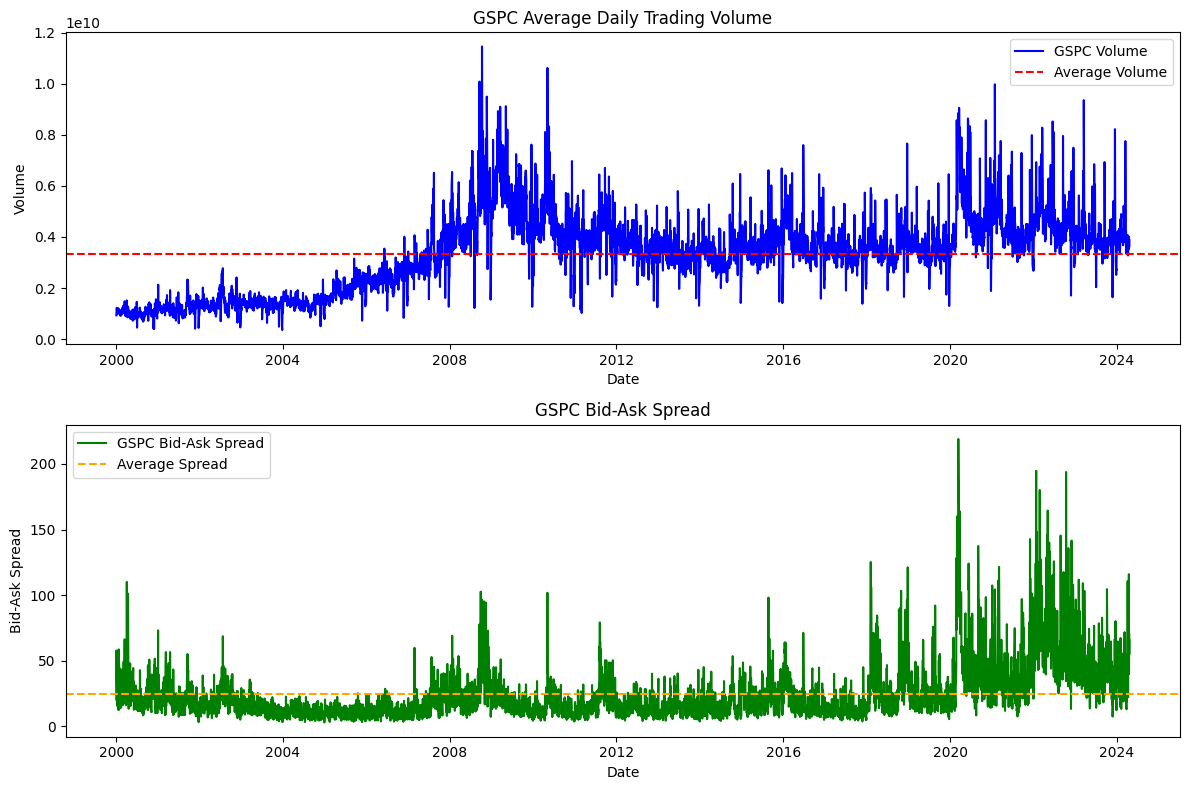

In [28]:
# Plotting average daily volume and bid-ask spread
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

# Plotting average daily volume
ax1.plot(sp500_volume, label="GSPC Volume", color='blue')
ax1.axhline(average_daily_volume, color='red', linestyle='--', label='Average Volume')
ax1.set_title("GSPC Average Daily Trading Volume")
ax1.set_xlabel("Date")
ax1.set_ylabel("Volume")
ax1.legend()

# Plotting bid-ask spread
ax2.plot(sp500_bid_ask_spread, label="GSPC Bid-Ask Spread", color='green')
ax2.axhline(average_bid_ask_spread, color='orange', linestyle='--', label='Average Spread')
ax2.set_title("GSPC Bid-Ask Spread")
ax2.set_xlabel("Date")
ax2.set_ylabel("Bid-Ask Spread")
ax2.legend()


plt.tight_layout()
plt.show()

# Question 7

After Exploring earning dates provided us many valuable insights, Below is the following strategy to select a subset of companies based on future earning events data :



1.   Data collection : we will collect calander data from trusted sources like Yahoo Finance, also we will collect earnings data for comparision.
2.   Data Preprocessing : we will clean and preprocess the data, by handling missing values and formatting in a proper format.
3. Analysis : In this step we will compare upcoming earnings with previous earnings then we will also compare some metrices like Surprise, Volatitlity, liquidity, earning growth around the earnings data.
4. Selection : we will use our analysis and select the appropriate companies as per our analysis.
5. Strategy Implementation : at last we can implement strategy like momentum which focuses on assets that have shown strong performance in the recent past, expecting that this performance will continue in the near future.

